In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('diamonds')

np.random.seed(42)
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices[:5], 'price'] = df['price'].max() * 5
cols_with_missing = ['carat', 'cut', 'color', 'clarity', 'price']
for col in cols_with_missing:
    nan_indices = np.random.choice(df.index, size=15, replace=False)
    df.loc[nan_indices, col] = np.nan
duplicates = df.head(5).copy()
df = pd.concat([df, duplicates], ignore_index=True)

# Проверка результата
print("\nПримеры выбросов:")
print(df.loc[outlier_indices].head())

print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())

print("\nКоличество дубликатов (полных):", df.duplicated().sum())



Примеры выбросов:
       carat        cut color clarity  depth  table    price     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0  94115.0  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0  94115.0  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0  94115.0  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0  94115.0  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0  94115.0  7.44  7.37  4.61

Количество пропусков по столбцам:
carat      15
cut        15
color      15
clarity    15
depth       0
table       0
price      15
x           0
y           0
z           0
dtype: int64

Количество дубликатов (полных): 151


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
carat,15
cut,15
color,15
clarity,15
price,15
depth,0
table,0
x,0
y,0
z,0


In [ ]:
df['price'] = df['price'].fillna(df['price'].median())
df['carat'] = df['carat'].fillna(df['carat'].median())
df['depth'] = df['depth'].fillna(df['depth'].median())
df['cut'] = df['cut'].fillna(df['cut'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['clarity'] = df['clarity'].fillna(df['clarity'].mode()[0])
df.isnull().sum().sort_values(ascending=False)

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)
df['cut'] = df['cut'].cat.codes + 1
df['color'] = df['color'].cat.codes + 1
df['clarity'] = df['clarity'].cat.codes + 1

print(df.head(12))


    carat  cut  color  clarity  depth  table  price     x     y     z
0    0.23    5      6        2   61.5   55.0  326.0  3.95  3.98  2.43
1    0.21    4      6        3   59.8   61.0  326.0  3.89  3.84  2.31
2    0.23    2      6        5   56.9   65.0  327.0  4.05  4.07  2.31
3    0.29    4      2        4   62.4   58.0  334.0  4.20  4.23  2.63
4    0.31    2      1        2   63.3   58.0  335.0  4.34  4.35  2.75
5    0.24    3      1        6   62.8   57.0  336.0  3.94  3.96  2.48
6    0.24    3      2        7   62.3   57.0  336.0  3.95  3.98  2.47
7    0.26    3      3        3   61.9   55.0  337.0  4.07  4.11  2.53
8    0.22    1      6        4   65.1   61.0  337.0  3.87  3.78  2.49
9    0.23    3      3        5   59.4   61.0  338.0  4.00  4.05  2.39
10   0.30    2      1        3   64.0   55.0  339.0  4.25  4.28  2.73
11   0.23    5      1        5   62.8   56.0  340.0  3.93  3.90  2.46


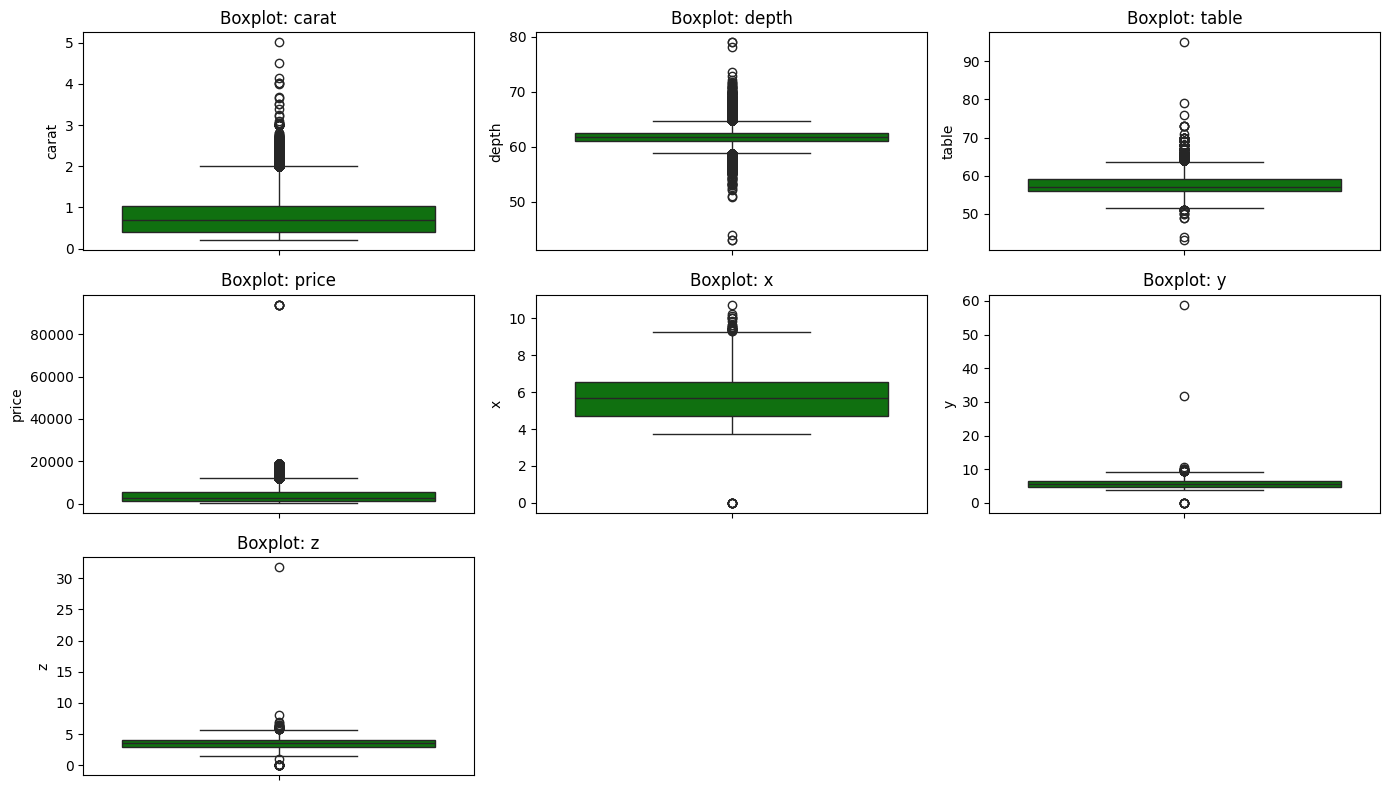

In [ ]:
plt.figure(figsize=(14, 8))
columns_to_check = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


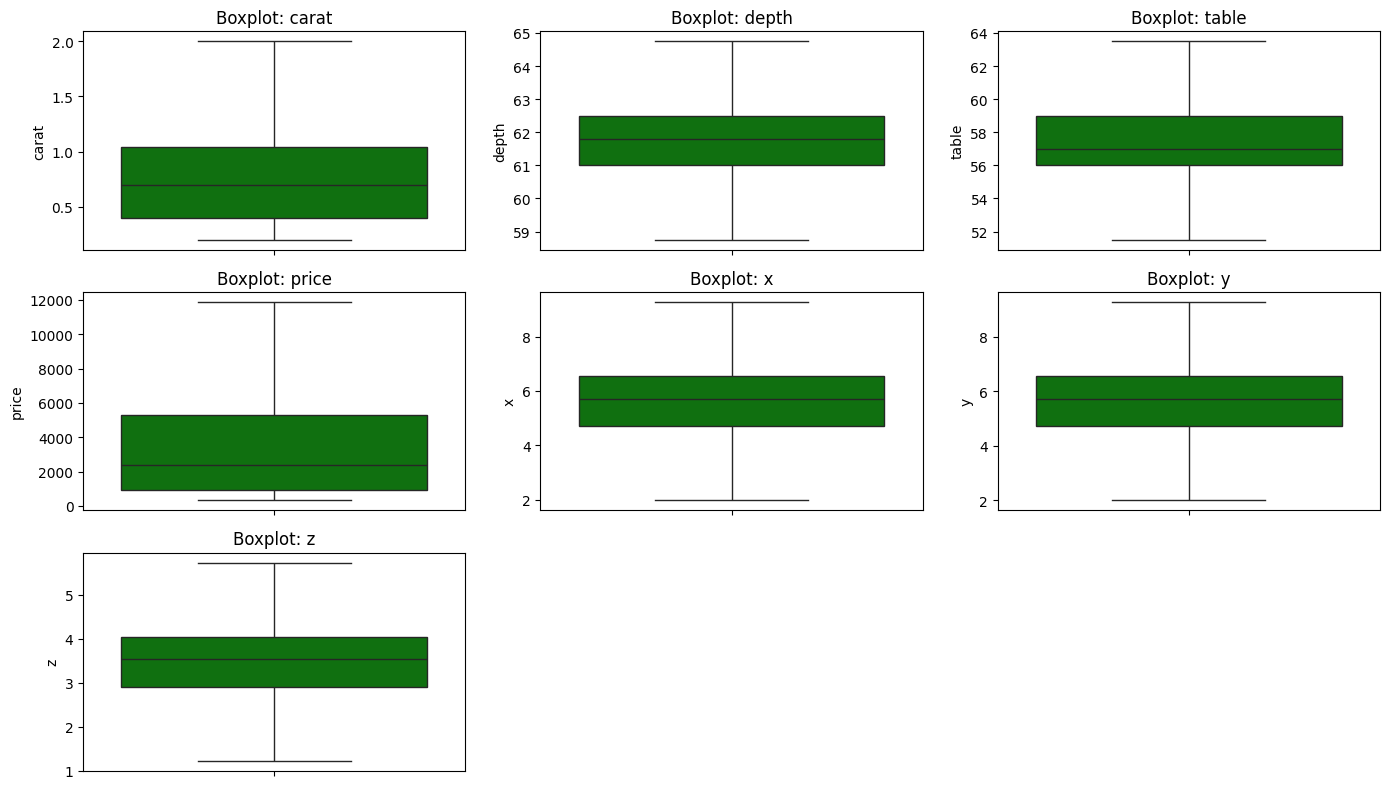

In [ ]:
def replace_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data.clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(14, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    df[col] = replace_outliers_iqr(df[col])
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


In [ ]:
df['price'] = np.log1p(df['price'])
df['carat'] = np.log1p(df['carat'])
df['table'] = np.log1p(df['table'])
df['y'] = np.log1p(df['y'])
df['z'] = np.log1p(df['z'])

from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'depth',
    'table',
    'x',
    'carat',
    'y',
    'z',
    'price',
    'cut',
    'color',
    'clarity'
]
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(f'Итоговые статистики после масштабирования:\n {df_scaled[cols_to_scale].describe().round(4)}')

Итоговые статистики после масштабирования:
             depth       table           x       carat           y           z  \
count  53945.0000  53945.0000  53945.0000  53945.0000  53945.0000  53945.0000   
mean       0.0000      0.0000      0.0000      0.0000     -0.0000     -0.0000   
std        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   
min       -2.3609     -2.9001     -3.3626     -1.5432     -4.8802     -4.6670   
25%       -0.5897     -0.6604     -0.9117     -0.9025     -0.9147     -0.9095   
50%        0.0401     -0.1868     -0.0278     -0.0956      0.0611      0.0637   
75%        0.5911      0.7365      0.7222      0.6622      0.7740      0.7691   
max        2.3624      2.7061      3.1731      2.2651      2.6630      2.6860   

            price         cut       color     clarity  
count  53945.0000  53945.0000  53945.0000  53945.0000  
mean      -0.0000      0.0000     -0.0000     -0.0000  
std        1.0000      1.0000      1.0000      1.0000  
mi

In [ ]:
from sklearn.model_selection import train_test_split
X = df_scaled[['carat', 'x', 'y', 'z']]
y = df_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Метрики модели линейной регрессии:')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')


Метрики модели линейной регрессии:
MAE: 0.2057
RMSE: 0.2666
R^2: 0.9281


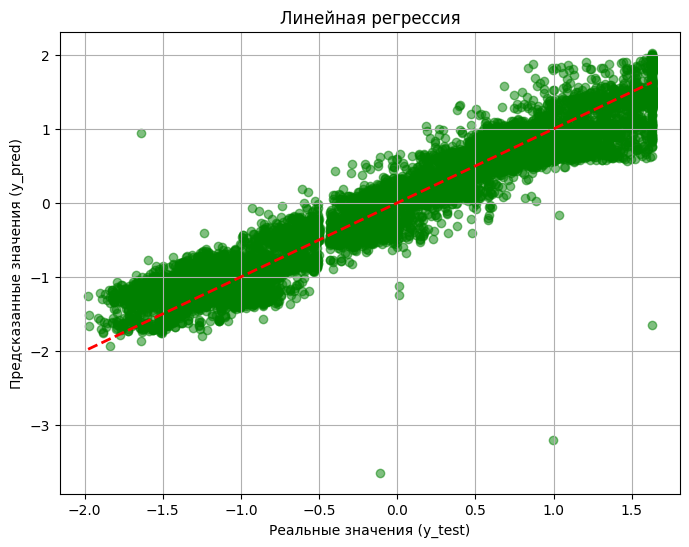

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.title('Линейная регрессия')
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
print(f'''R^2 на обучающей выборке: {r2_train:.4f}
R^2 на тестовой выборке: {r2_test:.4f}
Разница: {abs(r2_train - r2_test):.4f}''')


R^2 на обучающей выборке: 0.9292
R^2 на тестовой выборке: 0.9281
Разница: 0.0011


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, ElasticNet
from sklearn.model_selection import cross_val_score

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha = 1.0),
    'Lasso': Lasso(alpha = 0.01),
    'ElasticNet': ElasticNet(alpha = 0.01, l1_ratio = 0.5)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'r2')
    print(f'{name}: Cross Validate R^2 = {scores.mean():.4f} +- {scores.std():.4f}')

LinearRegression: Cross Validate R^2 = 0.9287 +- 0.0027
Ridge: Cross Validate R^2 = 0.9287 +- 0.0027
Lasso: Cross Validate R^2 = 0.9259 +- 0.0042
ElasticNet: Cross Validate R^2 = 0.9258 +- 0.0034


Обучение Ridge...
Обучение Lasso...
Обучение ElasticNet...


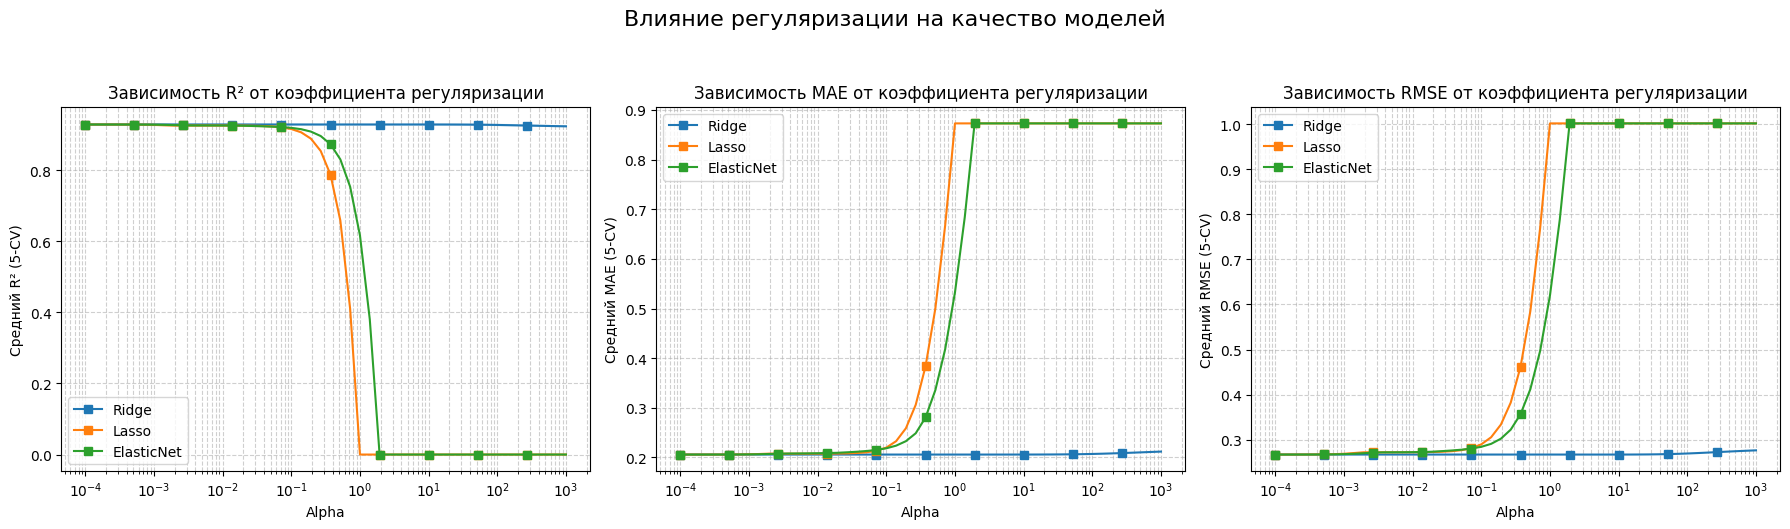

In [ ]:
alphas = np.logspace(-4, 3, 50)

def evaluate_model_with_alpha(model_class, alphas, X, y, model_name, scoring='r2'):
    mean_scores = []
    std_scores = []
    mean_mae = []
    mean_rmse = []

    for alpha in alphas:
        if model_name == 'Ridge':
            model = model_class(alpha=alpha)
        elif model_name == 'Lasso':
            model = model_class(alpha=alpha, max_iter=10000)  # Увеличиваем лимит итераций
        elif model_name == 'ElasticNet':
            model = model_class(alpha=alpha, l1_ratio=0.5, max_iter=10000)
        else:
            raise ValueError("Unsupported model name")

        # Кросс-валидация по R²
        r2_scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
        mean_scores.append(r2_scores.mean())
        std_scores.append(r2_scores.std())

        # MAE и RMSE
        mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        rmse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
        mean_mae.append(mae_scores.mean())
        mean_rmse.append(rmse_scores.mean())

    return alphas, mean_scores, std_scores, mean_mae, mean_rmse

models_to_evaluate = [
    ('Ridge', Ridge),
    ('Lasso', Lasso),
    ('ElasticNet', ElasticNet)
]
results = {}

for name, model_class in models_to_evaluate:
    print(f"Обучение {name}...")
    alphas, r2_mean, r2_std, mae_mean, rmse_mean = evaluate_model_with_alpha(
        model_class, alphas, X_train, y_train, name, scoring='r2'
    )
    results[name] = {
        'alphas': alphas,
        'r2_mean': r2_mean,
        'r2_std': r2_std,
        'mae_mean': mae_mean,
        'rmse_mean': rmse_mean
    }
plt.figure(figsize=(18, 5))

# График R^2
plt.subplot(1, 3, 1)
for name in results.keys():
    plt.plot(results[name]['alphas'], results[name]['r2_mean'], label=name, marker='s', markevery=5, linewidth=1.5)
    plt.fill_between(results[name]['alphas'],
                     np.array(results[name]['r2_mean']) - np.array(results[name]['r2_std']),
                     np.array(results[name]['r2_mean']) + np.array(results[name]['r2_std']),
                     alpha=0.2)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Средний R² (5-CV)')
plt.title('Зависимость R² от коэффициента регуляризации')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.6)

# График MAE
plt.subplot(1, 3, 2)
for name in results.keys():
    plt.plot(results[name]['alphas'], results[name]['mae_mean'], label=name, marker='s', markevery=5, linewidth=1.5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Средний MAE (5-CV)')
plt.title('Зависимость MAE от коэффициента регуляризации')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.6)

# График RMSE
plt.subplot(1, 3, 3)
for name in results.keys():
    plt.plot(results[name]['alphas'], results[name]['rmse_mean'], label=name, marker='s', markevery=5, linewidth=1.5)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Средний RMSE (5-CV)')
plt.title('Зависимость RMSE от коэффициента регуляризации')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.6)

plt.suptitle('Влияние регуляризации на качество моделей', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
lasso_model = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso_model.fit(X_train, y_train)

y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

coef_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

coef_df_lasso = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': coef_lasso,
    'Абсолютное_значение': np.abs(coef_lasso)
})

coef_df_lasso = coef_df_lasso.sort_values('Абсолютное_значение', ascending=False)
zero_coef_count = (coef_lasso == 0).sum()
non_zero_coef_count = (coef_lasso != 0).sum()

print(f"\nОбщее количество признаков: {len(coef_lasso)}")
print(f"Количество 'зануленных' признаков: {zero_coef_count}")
zero_coef_features = coef_df_lasso[coef_df_lasso['Коэффициент'] == 0]
non_zero_coef_features = coef_df_lasso[coef_df_lasso['Коэффициент'] != 0]

print("ПРИЗНАКИ С НУЛЕВЫМИ КОЭФФИЦИЕНТАМИ:")
if len(zero_coef_features) > 0:
    print(zero_coef_features['Признак'].to_string(index=False))


Общее количество признаков: 4
Количество 'зануленных' признаков: 1
ПРИЗНАКИ С НУЛЕВЫМИ КОЭФФИЦИЕНТАМИ:
x


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X.columns)
print(f'Создано полиномиальных признаков: {len(feature_names)}')
print(f'Имена признаков: {feature_names}')

Создано полиномиальных признаков: 14
Имена признаков: ['carat' 'x' 'y' 'z' 'carat^2' 'carat x' 'carat y' 'carat z' 'x^2' 'x y'
 'x z' 'y^2' 'y z' 'z^2']


In [ ]:
# Обучение Ridge на полиномиальных признаках
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_train_poly, y_train)
y_pred_poly = ridge_poly.predict(X_test_poly)

# Оценка качества
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f'''Модель с полиномиальными признаками (Ridge, alpha=1.0):
R^2: {r2_poly:.4f}
MAE: {mae_poly:.4f}
RMSE: {rmse_poly:.4f}''')

# Сравнение с исходной линейной моделью
print(f'''\nИсходная модель (carat, x, y, z):
R^2: {r2:.4f}
MAE: {mae:.4f}
RMSE: {rmse:.4f}''')


Модель с полиномиальными признаками (Ridge, alpha=1.0):
R^2: 0.9395
MAE: 0.1911
RMSE: 0.2445

Исходная модель (carat, x, y, z):
R^2: 0.9281
MAE: 0.2057
RMSE: 0.2666


In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(max_iter=10000))])

param_grid = {
    'poly__degree': [1, 2],
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.9]}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1)

print("Запуск GridSearchCV...")
grid_search.fit(X_train, y_train)
print(f'''Лучшие параметры:
{grid_search.best_params_}
Лучший R^2 на кросс-валидации: {grid_search.best_score_:.4f}''')


Запуск GridSearchCV...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучшие параметры:
{'poly__degree': 2, 'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.1}
Лучший R^2 на кросс-валидации: 0.9394


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f'''Лучшая модель на тестовой выборке:
R^2: {r2_best:.4f}
MAE: {mae_best:.4f}
RMSE: {rmse_best:.4f}
Разница R^2 с исходной моделью: {r2_best - r2:.4f}''')


Лучшая модель на тестовой выборке:
R^2: 0.9397
MAE: 0.1916
RMSE: 0.2442
Разница R^2 с исходной моделью: 0.0116
